In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

## Import Data

In [47]:
earnings_path = 'data\\processed\\df_quarter_eps_average_08_09.csv'
roe_path = 'data\\processed\\df_quarter_roe_average_08_09.csv'
key_path = 'data\\processed\\df_price07_18.csv'

In [48]:
# import eps data

df_eps = pd.read_csv(earnings_path)
df_eps.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df_eps.index = df_eps['Stock']
df_eps.drop('Stock', axis=1, inplace = True)

In [49]:
df_eps

,Recession EPS,Average EPS
Stock,,
AAN,0.49000,0.497708
AAPL,1.45250,4.532708
AAP,0.67000,1.230625
AA,-0.55500,-0.019542
ABC,0.70000,0.710417
...,...,...
XRX,0.12775,0.167521
X,0.90750,-0.126458
YUM,0.54250,0.743542


In [50]:
# import roe data

df_roe = pd.read_csv(roe_path)
df_roe.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df_roe.index = df_roe['Stock']
df_roe.drop('Stock', axis=1, inplace = True)

In [51]:
df_roe

,Recession ROE,Average ROE
Stock,,
AAN,0.127850,0.120373
AAPL,0.235625,0.351127
AAP,0.231750,0.253342
AA,-0.025475,-0.011304
ABMD,-0.309000,0.003308
...,...,...
XRAY,0.174200,0.090254
XRX,0.062900,0.064767
X,0.252875,-0.069517


In [59]:
df_key = pd.read_csv(key_path)
df_key.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
new = df_key['Stock'].str.split('_', expand=True)

df_key['symbol'] = new[0]
df_key['company'] = new[1]
df_key.index = df_key['symbol']
df_key = df_key[['symbol', 'company']]
df_key.sort_index(inplace=True)

In [60]:
df_key

,symbol,company
symbol,,
A,A,AGILENT TECHNOLOGIES INC
AAP,AAP,ADVANCE AUTO PARTS INC
AAPL,AAPL,APPLE
ABC,ABC,AMERISOURCEBERGEN CORP
ABT,ABT,ABBOTT LABORATORIES
...,...,...
XOM,XOM,EXXON MOBIL CORP
XRAY,XRAY,DENTSPLY SIRONA INC
XRX,XRX,XEROX CORP


## Limit stocks to SP500 that traded daily throughout the duration

In [61]:
# define indices

idx_roe = df_roe.index
idx_key = df_key.index
idx_eps = df_eps.index

In [62]:
# drop stocks from eps dataframe

idx_diff1 = idx_eps.difference(idx_key)
df_eps.drop(idx_diff1, inplace=True)
df_eps.shape

(355, 2)

In [63]:
# drop stocks from dividend dataframe

idx_diff2 = idx_roe.difference(idx_key)
df_roe.drop(idx_diff2, inplace=True)
df_roe.shape

(300, 2)

## Exploratory Scatterplots

<IPython.core.display.Javascript object>


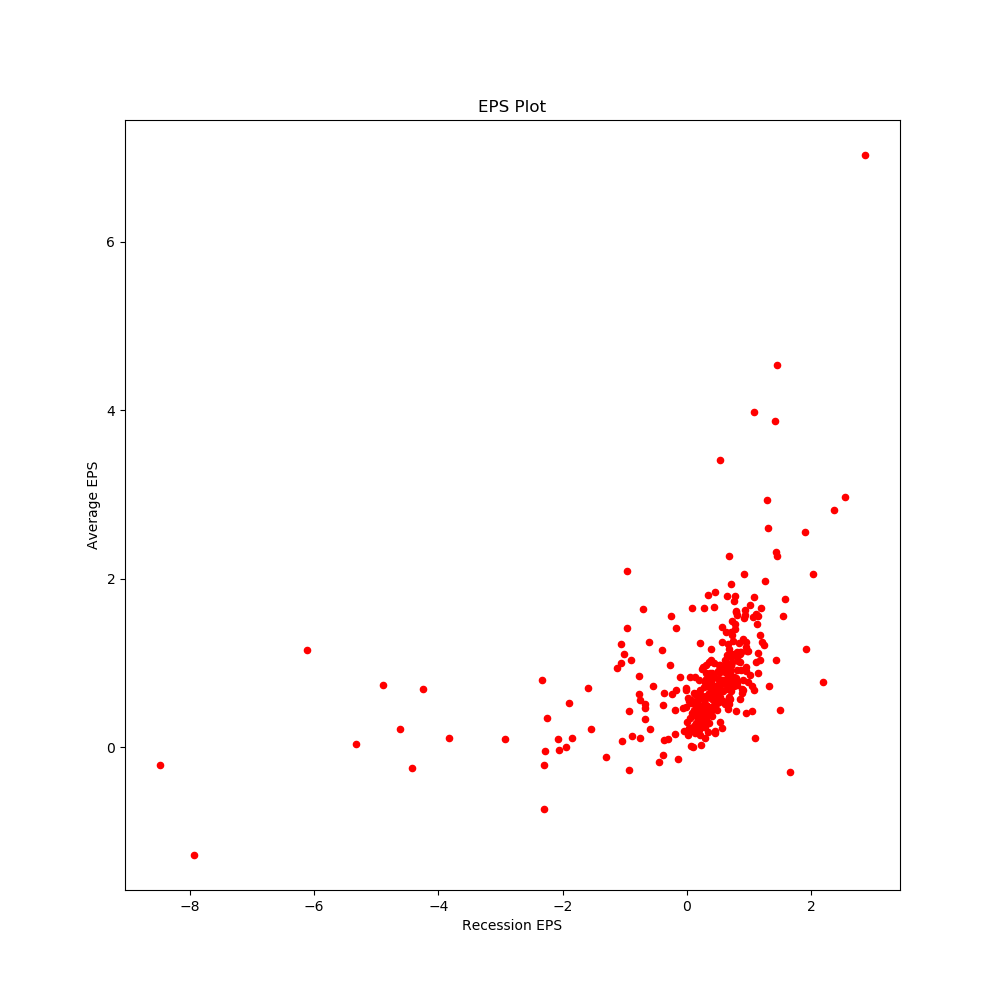

In [65]:
# eps plot

df_eps.plot(kind='scatter', x='Recession EPS', y='Average EPS', title='EPS Plot', figsize=(10,10), color='r')

<IPython.core.display.Javascript object>


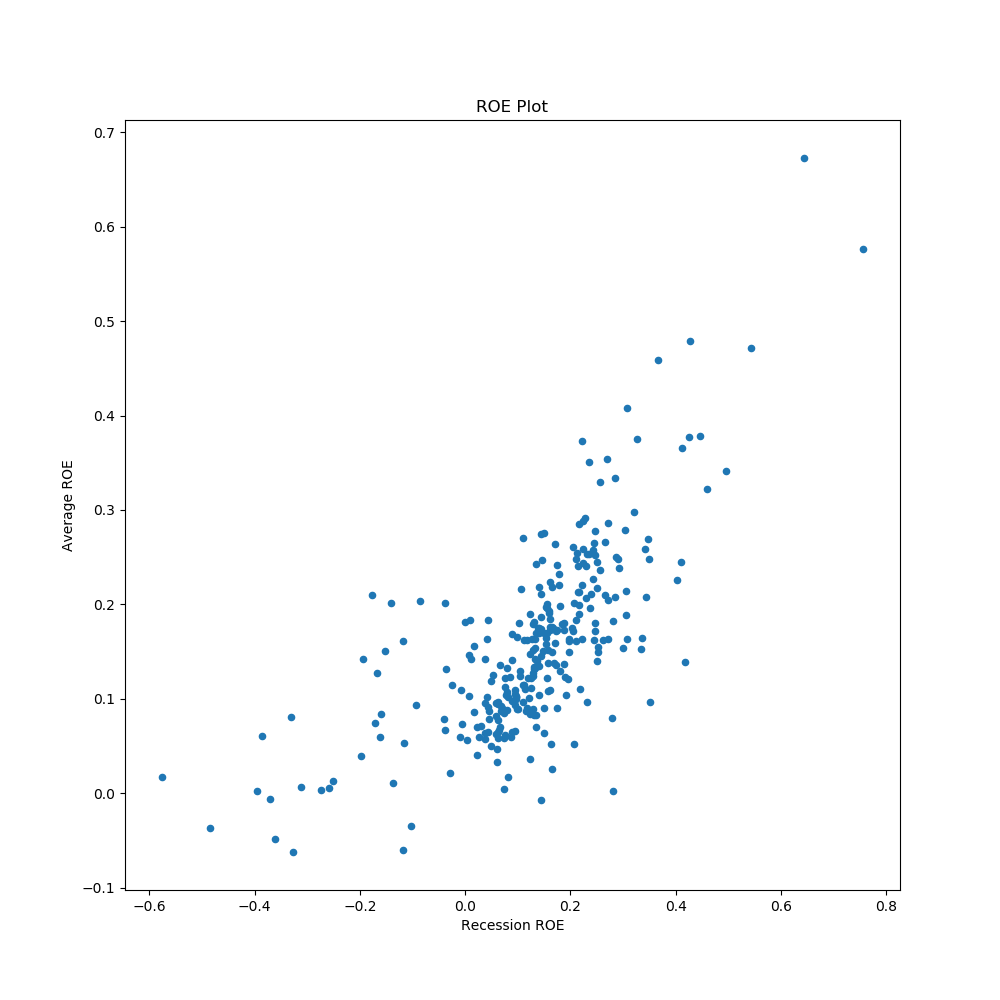

In [66]:
# roe plot

df_roe.plot(kind='scatter', x='Recession ROE', y='Average ROE', title='ROE Plot', figsize=(10,10))

## Implementing Hypothesis - EPS

In [67]:
# define colors assignment

colors = {1:'red', 0:'blue'}

In [69]:
# stocks where the difference between averages is less than 0.05 earning per share
# 38 stocks is too small an amount

diff = 0.05
df_eps['hypothesis']=np.where(abs(df_eps['Recession EPS']-df_eps['Average EPS']) <= diff, 1, 0)
df_eps[df_eps['hypothesis']==1].shape

(38, 3)

<IPython.core.display.Javascript object>


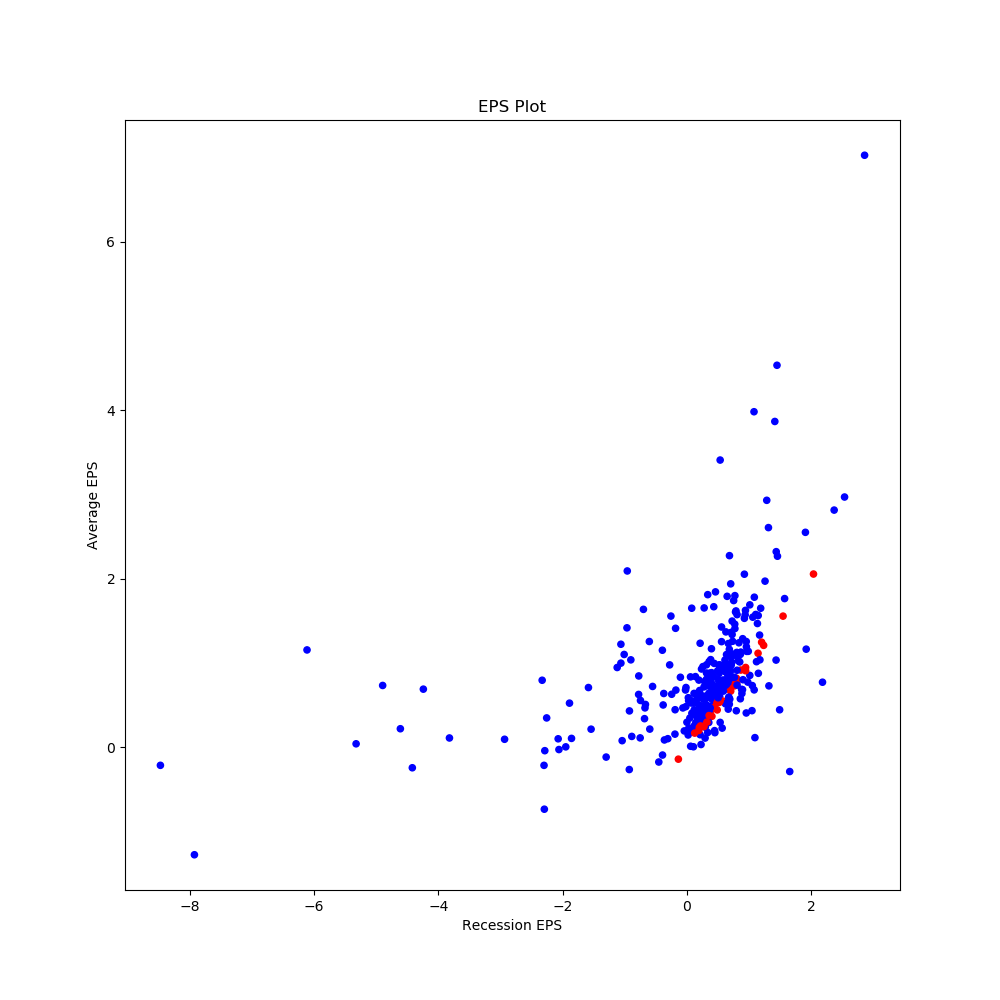

In [70]:
# plotting difference = 0.05

df_eps.plot(kind='scatter', x='Recession EPS', y='Average EPS', title='EPS Plot', figsize=(10,10), 
            c=df_eps['hypothesis'].apply(lambda x: colors[x]))

In [72]:
# stocks where the difference between averages is less than 0.1 earning per share
# 62 stocks is a sizable pool to choose from

diff = 0.1
df_eps['hypothesis']=np.where(np.absolute(df_eps['Recession EPS']-df_eps['Average EPS']) <= diff, 1, 0)
df_eps[df_eps['hypothesis']==1].shape

(62, 3)

<IPython.core.display.Javascript object>


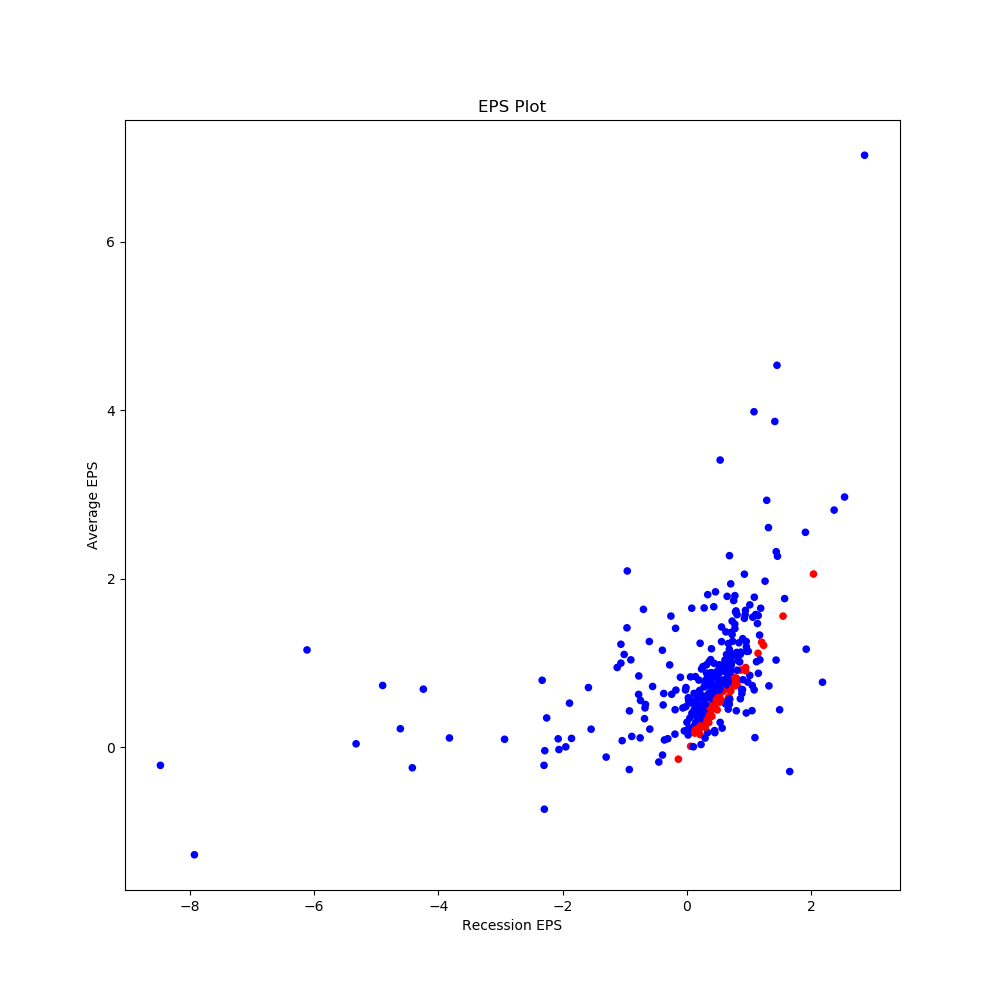

In [73]:
# plotting difference = 0.1

df_eps.plot(kind='scatter', x='Recession EPS', y='Average EPS', title='EPS Plot', figsize=(10,10), 
            c=df_eps['hypothesis'].apply(lambda x: colors[x]))

In [75]:
# stocks where the difference between averages is less than 0.1 earning per share
# 118 stocks might be too large

diff = 0.2
df_eps['hypothesis']=np.where(abs(df_eps['Recession EPS']-df_eps['Average EPS']) <= diff, 1, 0)
df_eps[df_eps['hypothesis']==1].shape

(118, 3)

<IPython.core.display.Javascript object>


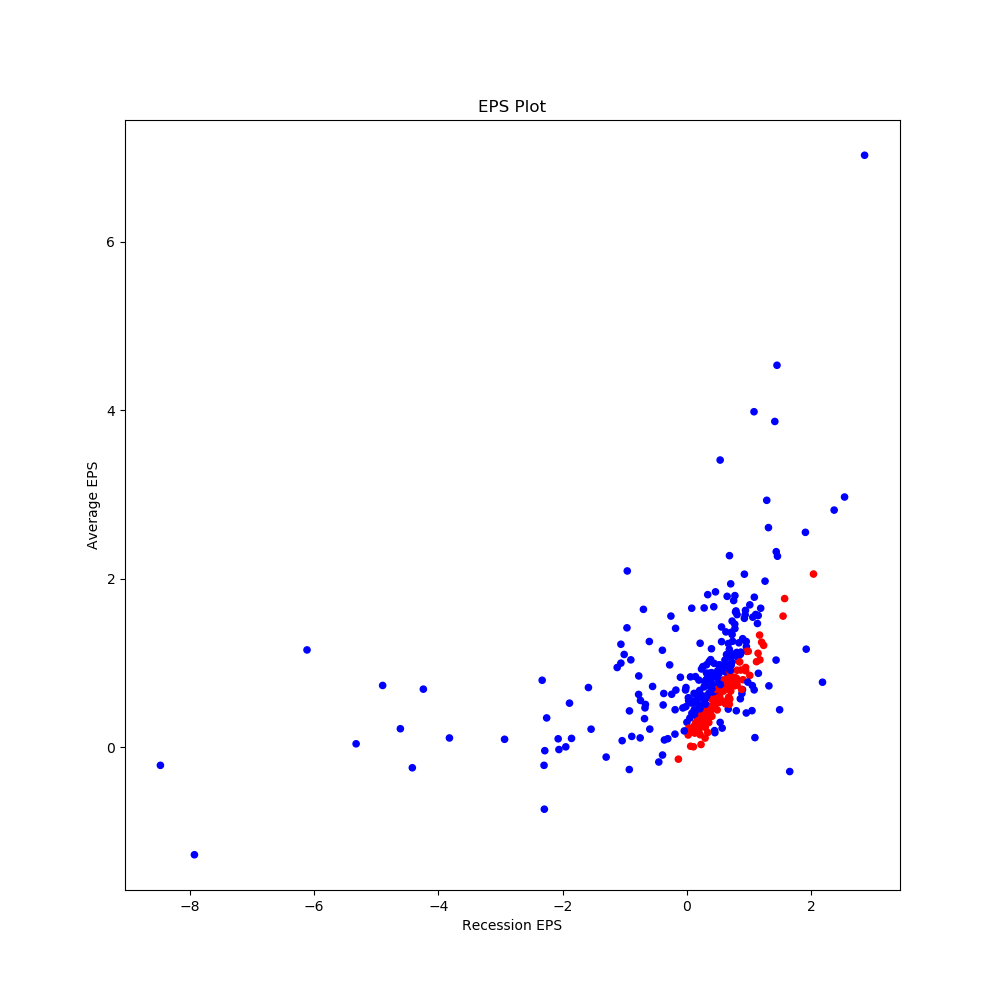

In [76]:
# plotting difference = 0.2

df_eps.plot(kind='scatter', x='Recession EPS', y='Average EPS', title='EPS Plot', figsize=(10,10), 
            c=df_eps['hypothesis'].apply(lambda x: colors[x]))

## Hypothesis Implementation - ROE

In [77]:
# stocks where the difference between averages is less than 0.01
# 43 stocks

diff = 0.01
df_roe['hypothesis']=np.where(abs(df_roe['Recession ROE']-df_roe['Average ROE'])<= diff, 1, 0)
df_roe[df_roe['hypothesis']==1].shape

(43, 3)

<IPython.core.display.Javascript object>


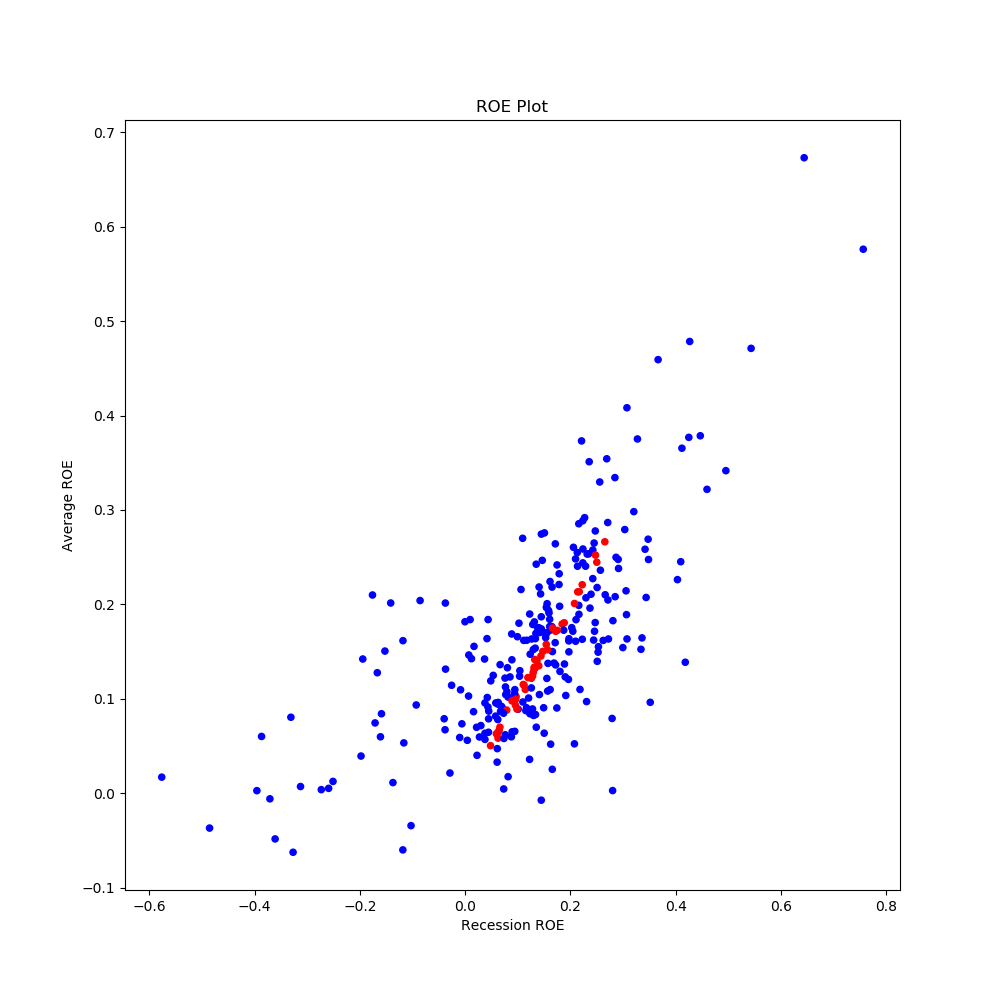

In [78]:
# plot of diff = 0.01

df_roe.plot(kind='scatter', x='Recession ROE', y='Average ROE', title='ROE Plot', figsize=(10,10), 
            c=df_roe['hypothesis'].apply(lambda x: colors[x]))

In [80]:
# stocks where the difference between averages is less than 0.03
# 109 stocks

diff = 0.03
df_roe['hypothesis']=np.where(abs(df_roe['Recession ROE']-df_roe['Average ROE'])<= diff, 1, 0)
df_roe[df_roe['hypothesis']==1].shape

(109, 3)

<IPython.core.display.Javascript object>


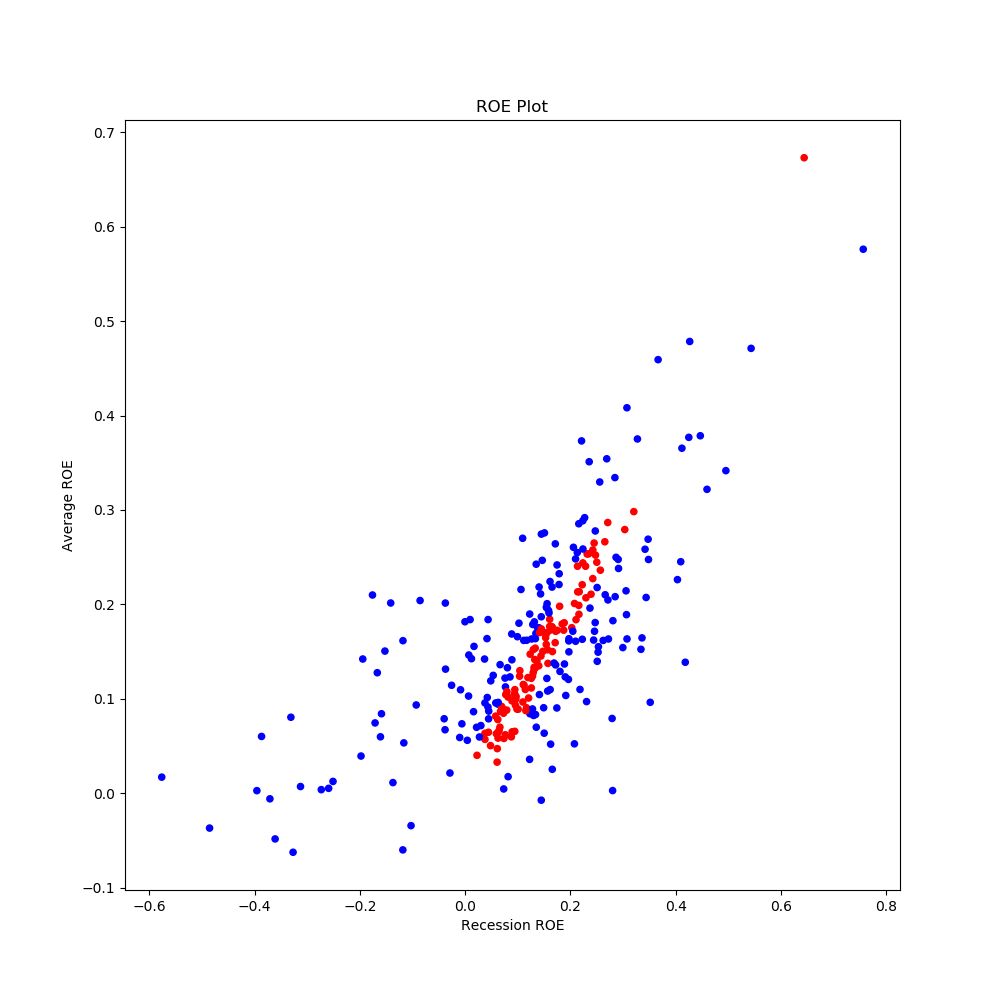

In [81]:
# plot of diff = 0.03

df_roe.plot(kind='scatter', x='Recession ROE', y='Average ROE', title='ROE Plot', figsize=(10,10), 
            c=df_roe['hypothesis'].apply(lambda x: colors[x]))

In [82]:
# stocks where the difference between averages is less than 0.03
# 160 stocks, close to half, too much

diff = 0.05
df_roe['hypothesis']=np.where(abs(df_roe['Recession ROE']-df_roe['Average ROE'])<= diff, 1, 0)
df_roe[df_roe['hypothesis']==1].shape

(160, 3)

<IPython.core.display.Javascript object>


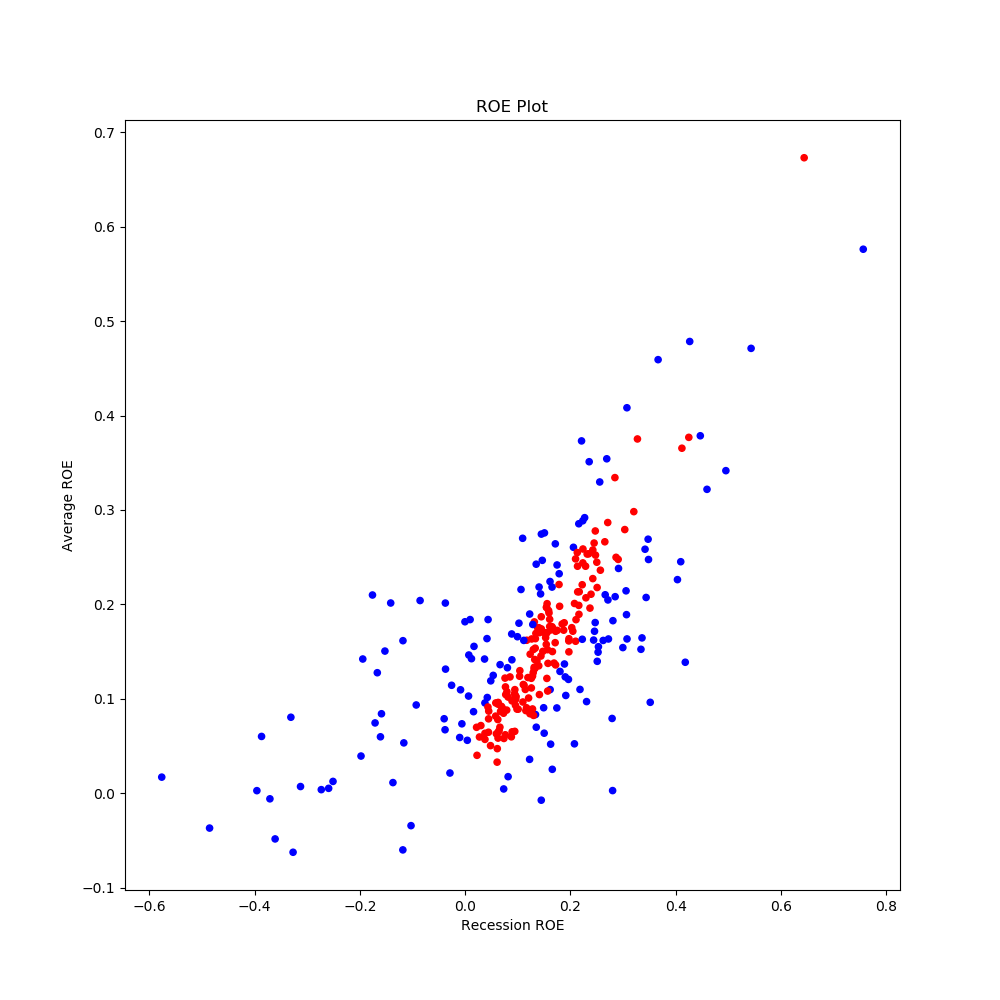

In [83]:
# plot of diff = 0.05

df_roe.plot(kind='scatter', x='Recession ROE', y='Average ROE', title='ROE Plot', figsize=(10,10), 
            c=df_roe['hypothesis'].apply(lambda x: colors[x]))

## Filter stocks to ideal Candidate pool

### Let's pick the top 20% of resistant stocks for our pool

In [130]:
# build candidate pool from EPS

ratio_eps = int(round(len(df_eps.index)*0.2))
df_eps_cand = df_eps
df_eps_cand['difference'] = abs(df_eps['Recession EPS']-df_eps['Average EPS'])
df_eps_cand.sort_values(by=['difference'], inplace=True)
df_eps_cand = df_eps_cand.iloc[0:ratio_eps, [0, 1, 3]]

In [131]:
# this looks right

df_eps_cand

,Recession EPS,Average EPS,difference
Stock,,,
DHR,0.9475,0.946458,0.001042
WMB,0.1950,0.198958,0.003958
XOM,1.5500,1.555833,0.005833
SBAC,-0.1350,-0.141646,0.006646
HRL,0.5250,0.532708,0.007708
...,...,...,...
CERN,0.6225,0.515208,0.107292
PG,1.1225,1.015000,0.107500
EMR,0.6250,0.735000,0.110000


In [134]:
# build candidate pool for roe

ratio_roe = int(round(len(df_roe.index)*0.2))
df_roe_cand = df_roe
df_roe_cand['difference'] = abs(df_roe['Recession ROE']-df_roe['Average ROE'])
df_roe_cand.sort_values(by=['difference'], inplace=True)
df_roe_cand = df_roe_cand.iloc[0:ratio_roe, [0, 1, 3]]

In [135]:
df_roe_cand

,Recession ROE,Average ROE,difference
Stock,,,
UA,0.131050,0.131415,0.000365
TXT,0.132825,0.132448,0.000377
TGT,0.171875,0.171494,0.000381
AMGN,0.213800,0.213265,0.000535
KO,0.265350,0.266310,0.000960
CERN,0.144000,0.145277,0.001277
XLNX,0.222375,0.220785,0.001590
DHR,0.129275,0.127673,0.001602
MET,0.064550,0.066396,0.001846
